In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from itertools import product
import warnings
warnings.filterwarnings("ignore")

In [2]:
combined = pd.read_csv("Combined_Dataset.csv")

In [3]:
vi = pd.read_csv("VI_oob_deaths.csv", index_col="Unnamed: 0")
# vi.set_index("column_names", inplace = True)

In [4]:
VI =vi.sort_values(by = "mrf.output$VI_oob", ascending = False)

In [5]:
VI

,mrf.output$VI_oob,column_names
7,0.207203,delta_deaths_per_capita_United.Kingdom
9,0.166550,delta_deaths_per_capita_Germany
4,0.152358,log_new_vaccines_per_capita
19,0.150085,day_of_the_week
8,0.144495,delta_cases_per_capita_Germany
10,0.136456,delta_cases_per_capita_France
5,0.134902,log_new_people_vaccinated_per_capita
20,0.134402,season
1,0.134192,delta_cases_per_capita
12,0.134043,full_lockdown


In [6]:
for idx in VI.index:
    if "delta" in VI.loc[idx, 'column_names']:
        VI.loc[idx, 'column_names'] = VI.loc[idx, 'column_names'].replace("delta", 'new')
    if "United_Kingdom" in VI.loc[idx, 'column_names']:
        VI.loc[idx, 'column_names'] = VI.loc[idx, 'column_names'].replace("United_Kingdom", 'UK')
    
    if "United.Kingdom" in VI.loc[idx, 'column_names']:
        VI.loc[idx, 'column_names'] = VI.loc[idx, 'column_names'].replace("United.Kingdom", 'UK')

Text(0.5, 1.0, 'MacroRandomForest variable importance measures based on out-of-bag prediction error for predicting deaths')

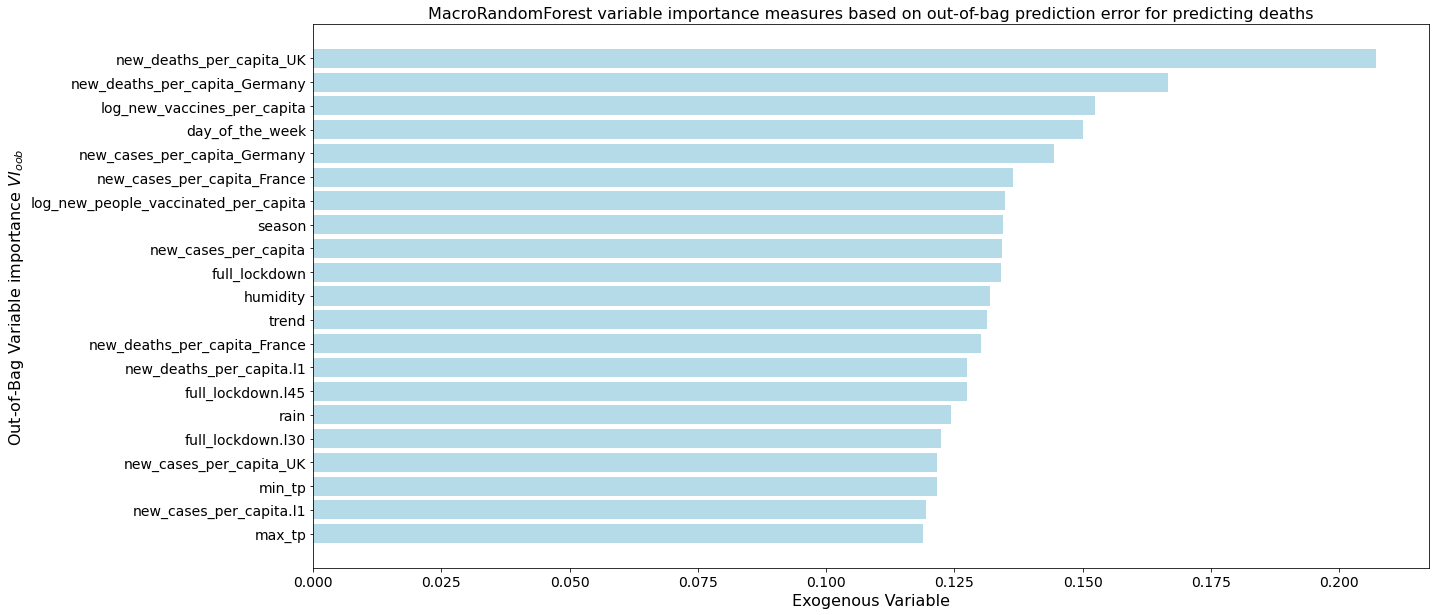

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.barh(VI['column_names'][::-1], width = VI['mrf.output$VI_oob'][::-1], color = 'lightblue', alpha = 0.9)
ax.tick_params(which = 'both', labelsize = 14)

ax.set_ylabel(r"Out-of-Bag Variable importance $VI_{oob}$", fontsize = 16)
ax.set_xlabel(r"Exogenous Variable", fontsize = 16)
ax.set_title("MacroRandomForest variable importance measures based on out-of-bag prediction error for predicting deaths", fontsize =  16)